<a href="https://colab.research.google.com/github/akash-agni/DeepLearning/blob/main/Copy_of_Autoencoder_For_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar10
import torch
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Training Data Images : {len(x_train)}")
print(f"Testing Data Images : {len(x_test)}")

Training Data Images : 50000
Testing Data Images : 10000


In [4]:
label_names = {0: 'airplane',
               1: 'automobile',
               2: 'bird',
               3: 'cat',
               4: 'deer',
               5: 'dog',
               6: 'frog',
               7: 'horse',
               8: 'ship',
               9: 'truck'}

In [5]:
x_train = x_train[(y_train == 1)[:,0],:,:,:]
x_test = x_test[(y_test == 1)[:,0],:,:,:]

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

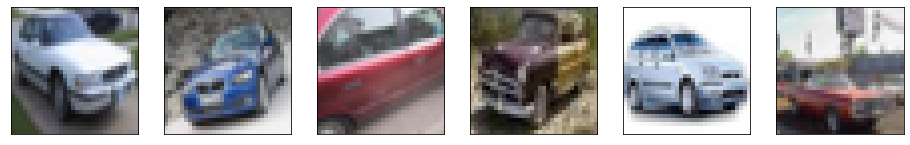

In [7]:
fig, ax = plt.subplots(figsize=(16,3), ncols=6)
for i in range(6):
  idx = np.random.randint(len(x_train))
  img = x_train[idx,:,:,:]
  ax[i].imshow(img)
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

In [101]:
class AutoEncoder(torch.nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = torch.nn.Sequential(
        torch.nn.Conv2d(3, 64, 3, 2, padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 64, 3, 1, padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 128, 3, 2, padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.Conv2d(128, 128, 3, 1, padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU()

    )

    self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose2d(128, 128, 3, 1, padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(128, 128, 3, 2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(128, 64, 3, 1, padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(64, 64, 3, 2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 3, 3, 1, padding=1),
        torch.nn.BatchNorm2d(3),
        torch.nn.Sigmoid()
    )

  def __call__(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [102]:
def train(dataloader, model, loss_fn, optimizer, device):
  size = len(dataloader)
  batch = 0
  for X in dataloader:
    X = X.float().to(device)

    pred = model(X)
    loss = loss_fn(pred, X)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % int(size/10) == 0:
      print(f"loss: {loss.item():>7f}  [{batch:>2d}/{size:>2d}]")
    batch += 1

In [107]:
dataloader = torch.utils.data.DataLoader(np.moveaxis(x_train, -1, 1), shuffle=True, batch_size=64)
device = 'cuda'
model = AutoEncoder().to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(model.parameters(),lr=0.1)
num_epochs = 10
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTr

In [108]:
for epoch in range(num_epochs):
  print(f"{epoch}/{num_epochs}")
  train(dataloader, model, loss_fn, optimizer, device)

0/10
loss: 0.117509  [ 0/79]
loss: 0.042659  [ 7/79]
loss: 0.037154  [14/79]
loss: 0.030393  [21/79]
loss: 0.030608  [28/79]
loss: 0.025672  [35/79]
loss: 0.022103  [42/79]
loss: 0.020635  [49/79]
loss: 0.019353  [56/79]
loss: 0.019654  [63/79]
loss: 0.018583  [70/79]
loss: 0.017650  [77/79]
1/10
loss: 0.016686  [ 0/79]
loss: 0.018539  [ 7/79]
loss: 0.017501  [14/79]
loss: 0.015485  [21/79]
loss: 0.015523  [28/79]
loss: 0.016433  [35/79]
loss: 0.014264  [42/79]
loss: 0.013461  [49/79]
loss: 0.012802  [56/79]
loss: 0.011412  [63/79]
loss: 0.014581  [70/79]
loss: 0.011744  [77/79]
2/10
loss: 0.013925  [ 0/79]
loss: 0.011363  [ 7/79]
loss: 0.011440  [14/79]
loss: 0.011437  [21/79]
loss: 0.010909  [28/79]
loss: 0.008791  [35/79]
loss: 0.008404  [42/79]
loss: 0.009032  [49/79]
loss: 0.009181  [56/79]
loss: 0.008954  [63/79]
loss: 0.009145  [70/79]
loss: 0.009571  [77/79]
3/10
loss: 0.012203  [ 0/79]
loss: 0.009191  [ 7/79]
loss: 0.008844  [14/79]
loss: 0.008730  [21/79]
loss: 0.008126  [28/

In [112]:
predictions = model(torch.tensor(np.moveaxis(x_test, -1, 1), dtype=torch.float32).to(device))

In [114]:
predictions = predictions.to('cpu').detach().numpy()

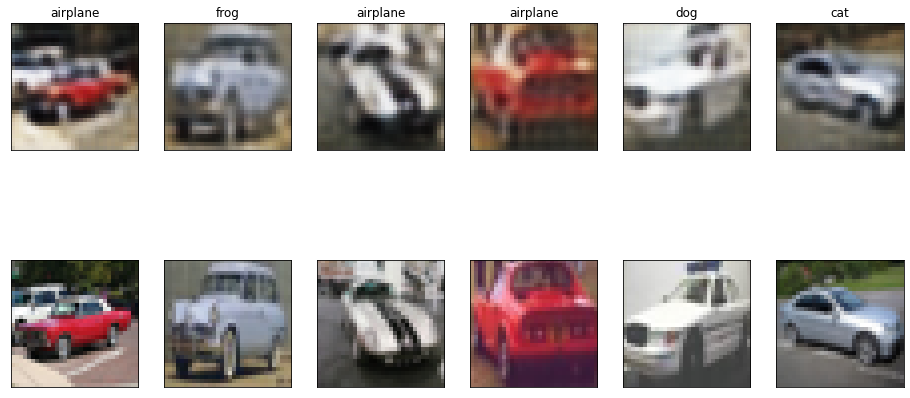

In [117]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2,ncols=6)
for i in range(6):
  idx = np.random.randint(len(predictions))
  pred_img = predictions[idx,:,:,:]
  pred_img = np.moveaxis(pred_img, 0, -1)
  label = y_test[idx][0]
  ax[0][i].imshow(pred_img)
  ax[0][i].set_title(label_names[label])
  ax[0][i].get_xaxis().set_visible(False)
  ax[0][i].get_yaxis().set_visible(False)

  orig_img = x_test[idx,:,:,:]
  ax[1][i].imshow(orig_img)
  ax[1][i].get_xaxis().set_visible(False)
  ax[1][i].get_yaxis().set_visible(False)

In [131]:
a1, a2 = np.moveaxis(x_test[0], -1, 0), np.moveaxis(x_test[1], -1, 0)
e1, e2 = model.encoder(torch.tensor([a1,a2], dtype=torch.float32).to(device)).to('cpu').detach().numpy()

In [132]:
e = list()
for i in range(10):
  e.append((e1*(i/10)) + (e2*((10-i)/10)))
e = torch.tensor(e, dtype=torch.float32)

In [137]:
d = model.decoder(e.to(device)).to('cpu').detach().numpy()

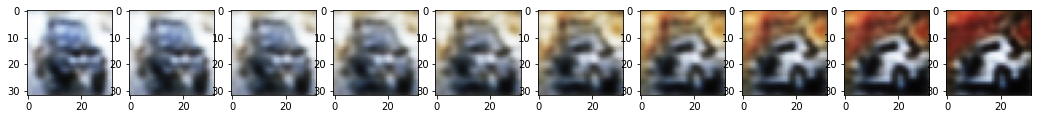

In [140]:
fig, ax = plt.subplots(figsize=(18,6), ncols=10)
x = 0
for i in d:
  img = np.moveaxis(i, 0, -1)
  ax[x].imshow(img)
  x += 1